<a href="https://colab.research.google.com/github/donosonahuel/alura-store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [86]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [87]:
tiendas_completas = [tienda,tienda2,tienda3,tienda4]
for i, t in enumerate(tiendas_completas, 1):
    ingresos = t["Precio"].sum()
    ingresos = "${:,.0f}".format(ingresos) #Formateamos el numero
    print(f"\n Ingresos de la Tienda {i} es: {ingresos}") #Imprimimos los ingresos de cada tienda


 Ingresos de la Tienda 1 es: $1,150,880,400

 Ingresos de la Tienda 2 es: $1,116,343,500

 Ingresos de la Tienda 3 es: $1,098,019,600

 Ingresos de la Tienda 4 es: $1,038,375,700


# 2. Ventas por categoría

In [88]:
for i, t in enumerate(tiendas_completas, 1):
    ventas = t.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)
    ventas_format = ventas.apply(lambda x: f"{x:,.0f}")
    print(f"\n Ventas Tienda {i} por Categoria")
    print(ventas_format.to_string()) #Imprimimos las ventas por categoría de cada tienda



 Ventas Tienda 1 por Categoria
Categoría del Producto
Electrónicos               429,493,500
Electrodomésticos          363,685,200
Muebles                    187,633,700
Instrumentos musicales      91,299,000
Deportes y diversión        39,290,000
Juguetes                    17,995,700
Artículos para el hogar     12,698,400
Libros                       8,784,900

 Ventas Tienda 2 por Categoria
Categoría del Producto
Electrónicos               410,831,100
Electrodomésticos          348,567,800
Muebles                    176,426,300
Instrumentos musicales     104,990,300
Deportes y diversión        34,744,500
Juguetes                    15,945,400
Artículos para el hogar     14,746,900
Libros                      10,091,200

 Ventas Tienda 3 por Categoria
Categoría del Producto
Electrónicos               410,775,800
Electrodomésticos          329,237,900
Muebles                    201,072,100
Instrumentos musicales      77,380,900
Deportes y diversión        35,593,100
Juguetes        

# 3. Calificación promedio de la tienda


In [89]:
for i, t in enumerate(tiendas_completas, 1):
    valoracion = t["Calificación"].mean().round(2) #Agrupamos por tienda y sacamos la media de la valoración
    print(f"\n Valoración media de la Tienda {i}: {valoracion:.2f}")


 Valoración media de la Tienda 1: 3.98

 Valoración media de la Tienda 2: 4.04

 Valoración media de la Tienda 3: 4.05

 Valoración media de la Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [96]:
for i, t in enumerate(tiendas_completas, 1):
    productos_max_min = t["Producto"].value_counts().to_string()
    productos_max_min = t["Producto"].value_counts().to_string()
    print(f"\n Producto más y menos vendidos de la Tienda {i}: {productos_max_min}")


 Producto más y menos vendidos de la Tienda 1: Producto
Microondas                     60
TV LED UHD 4K                  60
Armario                        60
Secadora de ropa               58
Mesa de noche                  56
Bloques de construcción        56
Balón de baloncesto            55
Bicicleta                      54
Vaso térmico                   54
Refrigerador                   54
Impresora                      54
Batería                        53
Cubertería                     52
Carrito de control remoto      52
Modelado predictivo            51
Auriculares                    50
Ajedrez de madera              49
Iphone 15                      49
Lavavajillas                   48
Lavadora de ropa               47
Guitarra eléctrica             47
Guitarra acústica              46
Sofá reclinable                46
Silla de oficina               46
Estufa                         45
Cama box                       44
Kit de bancas                  44
Smart TV                 

# 5. Envío promedio por tienda

In [70]:
for i, t in enumerate(tiendas_completas, 1):
    costo_envio = t["Costo de envío"].mean()
    costo_envio = round(costo_envio, 2)
    costo_envio = "${:,.2f}".format(costo_envio) #Formateamos el costo de envio
    print(f"\n El costo promedio de envio de la tienda {i} es: {costo_envio}")


 El costo promedio de envio de la tienda 1 es: $26,018.61

 El costo promedio de envio de la tienda 2 es: $25,216.24

 El costo promedio de envio de la tienda 3 es: $24,805.68

 El costo promedio de envio de la tienda 4 es: $23,459.46


# 6. Graficos Matplotlib

In [93]:
import matplotlib.pyplot as plt
import numpy as np




Productos mas y menos vendidos

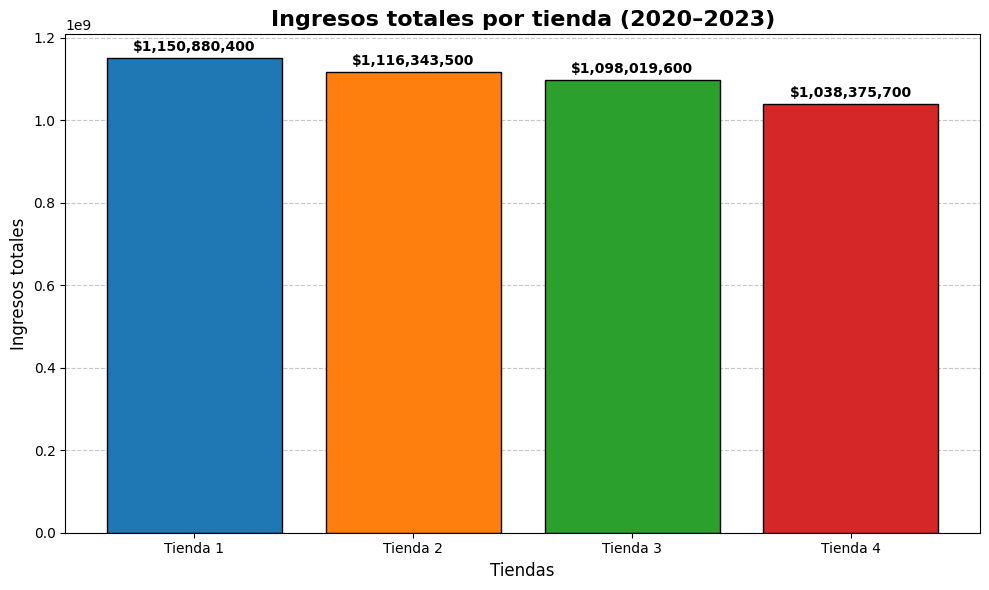

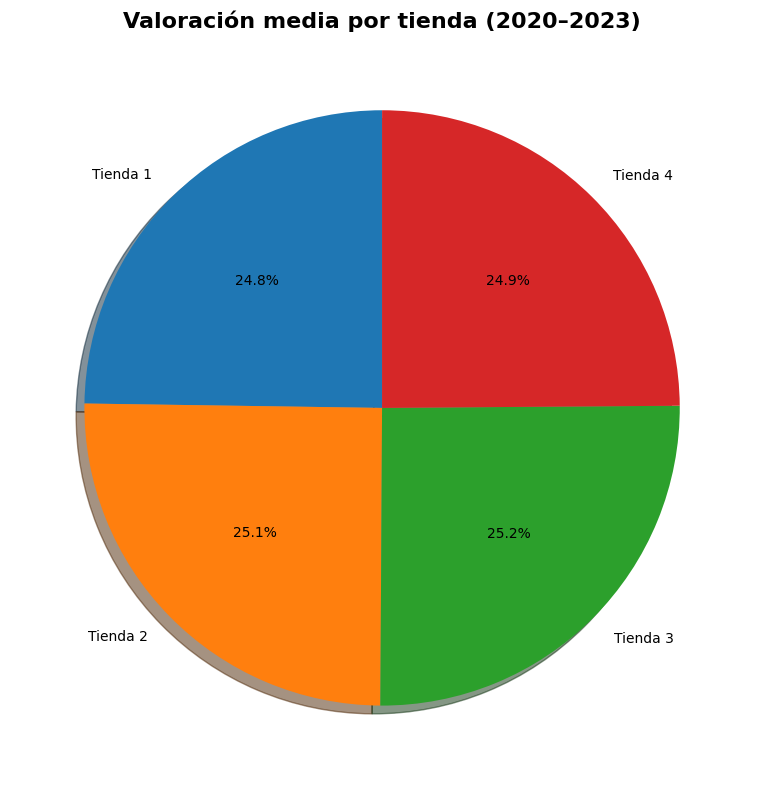

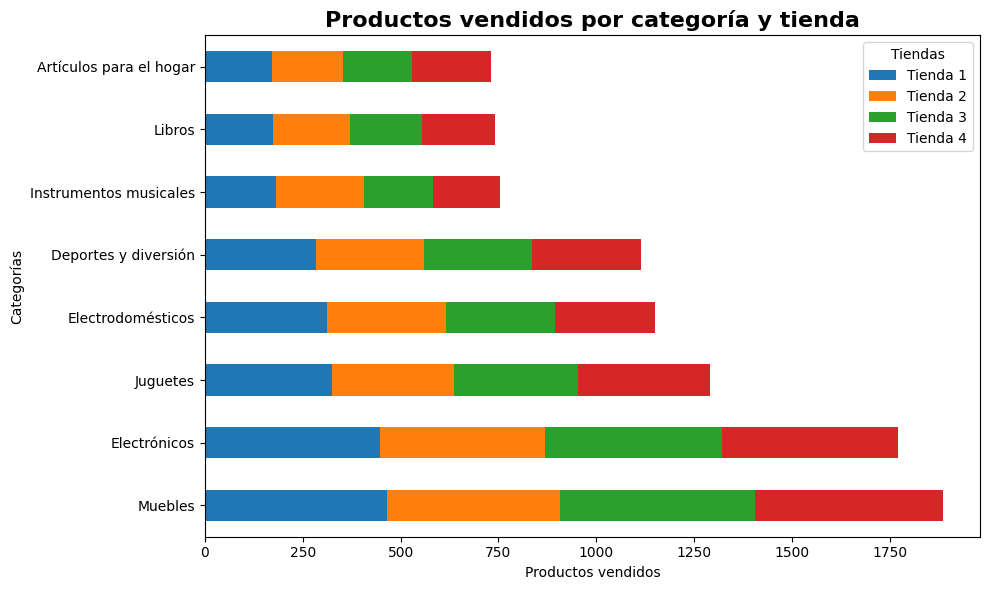

In [94]:
# 1º #Ingresos de las tiendas en grafico
# Datos
x = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
y = [tienda["Precio"].sum(), tienda2["Precio"].sum(), tienda3["Precio"].sum(), tienda4["Precio"].sum()]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(x, y, color=colors, edgecolor='black')

# Título y etiquetas
ax.set_title("Ingresos totales por tienda (2020–2023)", fontsize=16, fontweight='bold')
ax.set_xlabel("Tiendas", fontsize=12)
ax.set_ylabel("Ingresos totales", fontsize=12)

# Etiquetas encima de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1e7,
            f"${yval:,.0f}", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Estilo del eje Y
ax.grid(axis="y", linestyle="--", alpha=0.7)
ax.set_axisbelow(True)

# Rotación de etiquetas
plt.xticks(rotation=0)

# Ajuste visual
plt.tight_layout()

# Mostrar gráfico
plt.show()

# 2º Valoracion media por tienda en grafico

# Datos
x1 = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
y1 = [
    tienda["Calificación"].mean(),
    tienda2["Calificación"].mean(),
    tienda3["Calificación"].mean(),
    tienda4["Calificación"].mean()
]

# Colores personalizados
colors1 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Crear gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(
    y1,
    labels=x1,
    colors=colors1,
    autopct="%1.1f%%",
    startangle=90,
    shadow=True
)

# Título
ax.set_title("Valoración media por tienda (2020–2023)", fontsize=16, fontweight='bold')

# Ajuste del layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()
# 1. Contar productos por categoría para cada tienda
ventas1 = tienda["Categoría del Producto"].value_counts()
ventas2 = tienda2["Categoría del Producto"].value_counts()
ventas3 = tienda3["Categoría del Producto"].value_counts()
ventas4 = tienda4["Categoría del Producto"].value_counts()

# 2. Unir en un solo DataFrame
ventas_df = pd.DataFrame({
    "Tienda 1": ventas1,
    "Tienda 2": ventas2,
    "Tienda 3": ventas3,
    "Tienda 4": ventas4
}).fillna(0)

# 3. Convertir a enteros
ventas_df = ventas_df.astype(int)

# 4. Agregar columna de total por categoría y ordenar de menor a mayor
ventas_df["Total"] = ventas_df.sum(axis=1)
ventas_df = ventas_df.sort_values("Total", ascending=False)

# 5. Eliminar la columna de total (solo era para ordenar)
ventas_df.drop(columns="Total", inplace=True)

# 6. Crear carpeta "Graficos" si no existe
if not os.path.exists("Graficos"):
    os.makedirs("Graficos")

# 7. Crear gráfico de barras horizontales apiladas
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
ventas_df.plot(kind='barh', stacked=True, color=colors, figsize=(10, 6))

# 8. Personalización
plt.title("Productos vendidos por categoría y tienda", fontsize=16, fontweight="bold")
plt.xlabel("Productos vendidos")
plt.ylabel("Categorías")
plt.legend(title="Tiendas", loc="upper right")
plt.tight_layout()

# 9. Mostrar gráfico
plt.show()

# 7. Informe Final

# **Recomendación de Tienda para el Sr. Juan**  

### **Introducción**  
El siguiente informe detalla el desempeño comparativo de las cuatro tiendas, utilizando cinco métricas fundamentales: facturación total, ventas por categoría, calificación promedio de clientes, productos más/menos vendidos y costos de envío promedio. Con base en este análisis, se ofrecerá una recomendación al Sr. Juan para la priorización de tiendas en su estrategia comercial.

---

# **Tienda a Considerar para Cerrar: Tienda 4**

## **Razones:**

**Menores Ingresos Totales:** Es la tienda con la facturación más baja ($1,038,375,700), significativamente por debajo de las demás.

**Debilidad Crítica en una Categoría Principal:** Su desempeño en la categoría de "Electrodomésticos" es notablemente inferior en comparación con las otras tiendas.
Esta es una de las categorías que más aportan a los ingresos generales, por lo que una debilidad aquí es muy perjudicial.

**Bajos Costos de Envío no Compensan:** Aunque tiene el costo de envío promedio más bajo (lo cual es positivo), esto no se traduce en una mejor posición de ingresos o un desempeño superior en ventas generales. Podría indicar que, a pesar de esta ventaja operativa, la tienda no logra atraer suficientes ventas o vender productos de alto valor de manera efectiva.

**Ingresos en Electrónicos:** Aunque no es la peor, también está en el extremo inferior en ingresos por Electrónicos comparada con la Tienda 1 y 2.
Consideración: Si bien la eficiencia en costos de envío es una ventaja, no es suficiente para compensar la brecha de ingresos y la marcada debilidad en una categoría tan importante como Electrodomésticos. Los recursos (inventario, personal, marketing) asignados a la Tienda 4 podrían ser redirigidos para fortalecer las tiendas con mejor desempeño o para optimizar los costos en la Tienda 1.